In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
url = 'https://raw.githubusercontent.com/jorge-robledo11/Datasets/main/Datasets/gt_2011.csv'
url2 = 'https://raw.githubusercontent.com/jorge-robledo11/Datasets/main/Datasets/gt_2012.csv'
url3 = 'https://raw.githubusercontent.com/jorge-robledo11/Datasets/main/Datasets/gt_2013.csv'
dataset = pd.read_csv(url, encoding='utf-8')
dataset2 = pd.read_csv(url2)
dataset3 = pd.read_csv(url3)

dataset_f = pd.concat([dataset, dataset2, dataset3], axis=0)

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Seed
seed = 1337
np.random.seed(seed)

# Copy
data = dataset_f.copy()

# Evitamos la notación científica y rendondeamos los valores a 2 dígitos después de la coma
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# Dataset
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.59,"1,018.70",83.67,3.58,23.98,"1,086.20",549.83,134.67,11.90,0.33,81.95
1,4.29,"1,018.30",84.23,3.57,23.95,"1,086.10",550.05,134.67,11.89,0.45,82.38
2,3.90,"1,018.40",84.86,3.58,23.99,"1,086.50",550.19,135.10,12.04,0.45,83.78
3,3.74,"1,018.30",85.43,3.58,23.91,"1,086.50",550.17,135.03,11.99,0.23,82.50
4,3.75,"1,017.80",85.18,3.58,23.92,"1,085.90",550.00,134.67,11.91,0.27,82.03


In [5]:
# Shape
print(f'Filas: {data.shape[0]}')
print(f'Columnas: {data.shape[1]}')

Filas: 22191
Columnas: 11


In [6]:
# Data types for each predictor
print(data.dtypes)

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object


In [7]:
# Capturar los tipos de variables
categoricals = [col for col in data.columns if data[col].dtypes == 'object']
temporary = [col for col in data.columns if 'Yr' in col or 'Year' in col]
discretes = [col for col in data.columns if data[col].dtype != 'object' 
            and len(data[col].unique()) < 20 and col not in temporary]
continuous = [col for col in data.columns if data[col].dtype != 'object'
            if col not in discretes and col not in ['THEY'] and col not in temporary]

# Variables
print(f'Hay {len(continuous)} variables continuas')
print(f'Hay {len(discretes)} variables discretas')
print(f'Hay {len(temporary)} variables temporales')
print(f'Hay {len(categoricals)} variables categóricas')

Hay 11 variables continuas
Hay 0 variables discretas
Hay 0 variables temporales
Hay 0 variables categóricas


In [8]:
# Missing values
for col in data.columns:
    if data[col].isnull().sum() > 0:
        print(col, data[col].isnull().mean())

In [9]:
# Summary
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,"22,191.00","22,191.00","22,191.00","22,191.00","22,191.00","22,191.00","22,191.00","22,191.00","22,191.00","22,191.00","22,191.00"
mean,17.71,"1,012.81",79.56,4.04,25.32,"1,083.08",545.52,133.54,12.06,2.21,68.78
std,7.35,6.40,13.92,0.81,4.23,16.84,7.71,16.03,1.11,2.30,11.04
min,0.29,985.85,27.50,2.09,17.88,"1,000.80",512.45,100.17,9.88,0.00,27.77
25%,11.66,"1,008.80",70.29,3.45,22.74,"1,074.60",542.60,124.26,11.39,1.00,61.55
50%,17.74,"1,012.40",82.78,4.07,24.99,"1,088.10",549.90,133.77,12.00,1.52,67.10
75%,23.66,"1,016.70",90.53,4.45,26.84,"1,095.30",550.05,138.64,12.44,2.54,74.57
max,34.93,"1,034.20",100.20,7.61,37.40,"1,100.80",550.61,174.61,15.08,44.10,119.91


In [10]:
# Skew for each predictor
print(round(data.skew().sort_values(), 2))

TAT    -1.50
TIT    -1.03
AH     -0.72
AT      0.01
AP      0.06
TEY     0.15
CDP     0.27
AFDP    0.38
GTEP    0.39
NOX     1.11
CO      4.93
dtype: float64


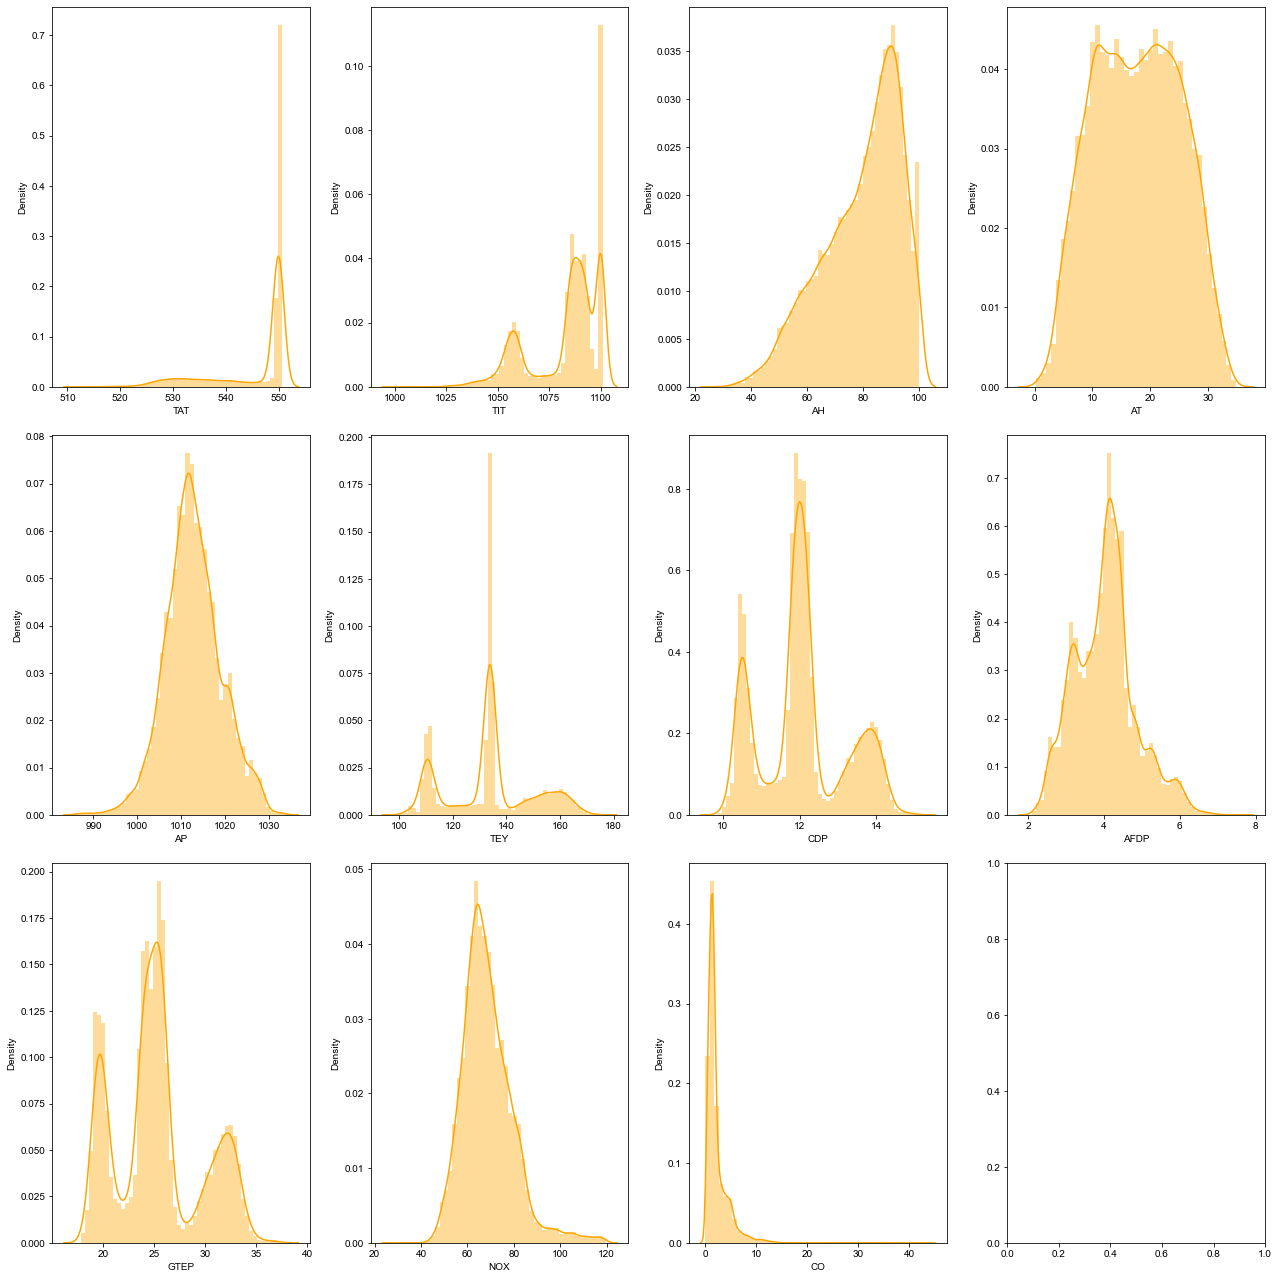

In [11]:
# Univariate Density distribution
%matplotlib inline
f, axes = plt.subplots(3,4, figsize=(18,18))
sns.distplot(data['TAT'], ax = axes[0,0], color='orange')
sns.distplot(data['TIT'], ax = axes[0,1], color='orange')
sns.distplot(data['AH'], ax = axes[0,2], color='orange')
sns.distplot(data['AT'], ax = axes[0,3], color='orange')
sns.distplot(data['AP'], ax = axes[1,0], color='orange')
sns.distplot(data['TEY'], ax = axes[1,1], color='orange')
sns.distplot(data['CDP'], ax = axes[1,2], color='orange')
sns.distplot(data['AFDP'], ax = axes[1,3], color='orange')
sns.distplot(data['GTEP'], ax = axes[2,0], color='orange')
sns.distplot(data['NOX'], ax = axes[2,1], color='orange')
sns.distplot(data['CO'], ax = axes[2,2], color='orange')
sns.set_theme(style='darkgrid', palette='pastel', font_scale=1.2, color_codes=True)
plt.tight_layout();

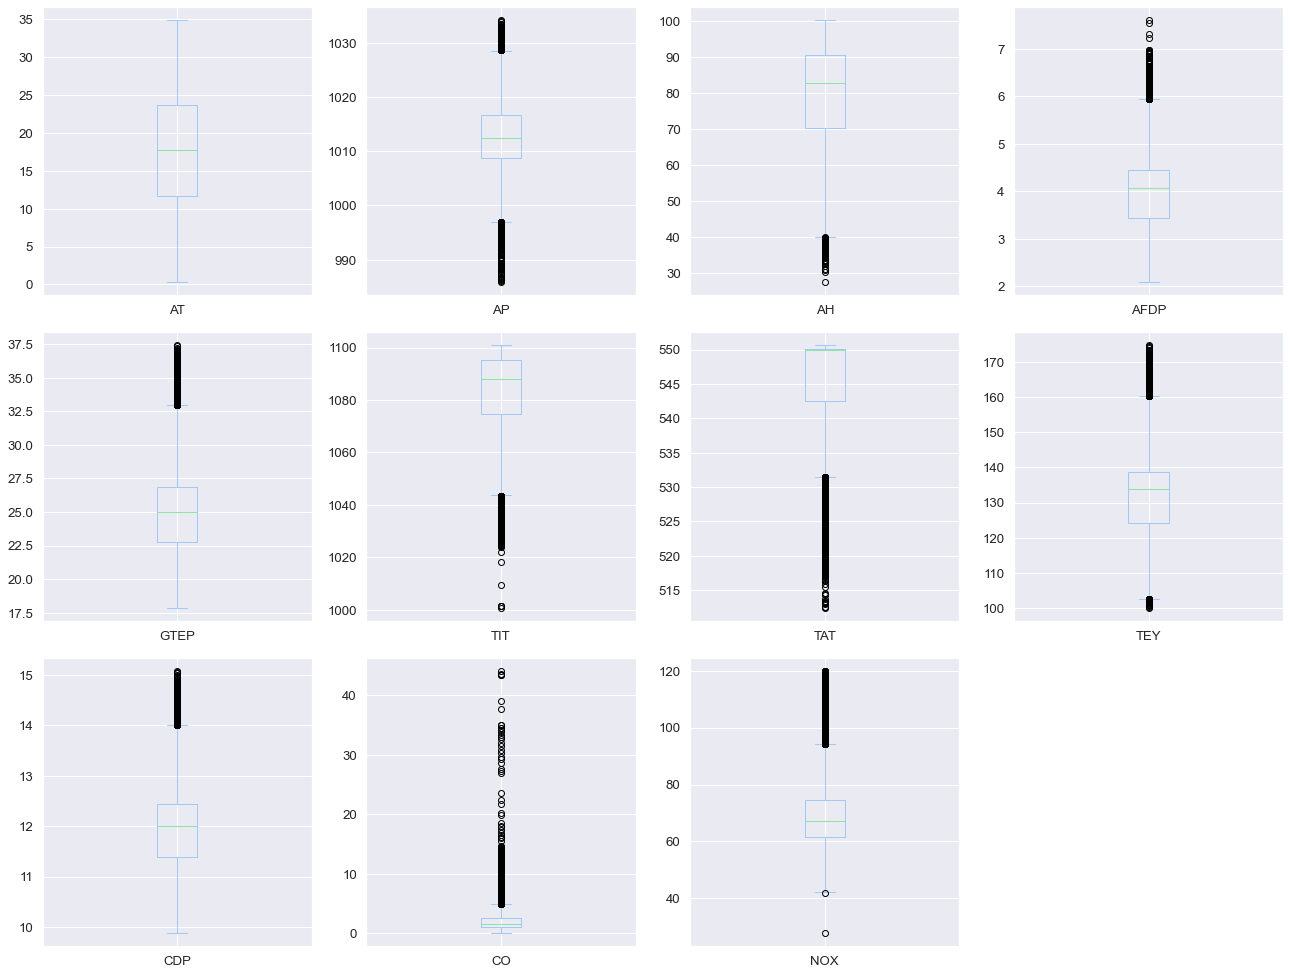

In [12]:
# Univariate Boxplot
%matplotlib inline
fig = plt.figure(figsize=(18,18))
ax = fig.gca()
data.plot(ax = ax, kind='box', subplots=True, layout = (4,4), sharex = False)
plt.title('Predictores\n', fontsize=16)
sns.set_theme(style='whitegrid', palette='dark', font_scale=1.2, color_codes=True)
plt.tight_layout();

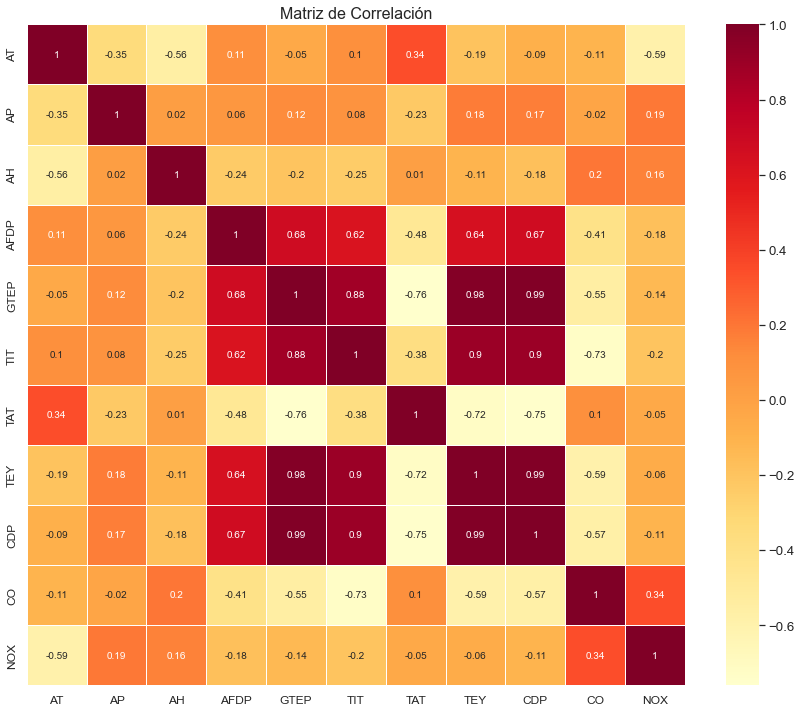

In [13]:
# Pairwise Pearson correlations
%matplotlib inline
correlations = data.corr(method='pearson').round(2)
plt.figure(figsize=(12,10))
ax = sns.heatmap(correlations, vmax=1, annot=True, cmap='YlOrRd', linewidths=1)
plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

In [14]:
# Separamos datos de train, test y validación
X = data.drop(['TEY'], axis=1)
y = data[['TEY']]

# Split dataset
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.60, test_size=0.40, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.50, random_state=seed)
print('100% Dataset:', X.shape, y.shape)
print('• '*24)
print('60% Train set:', X_train.shape, y_train.shape)
print('20% Validation set:', X_val.shape, y_val.shape)
print('20% Test set:', X_test.shape, y_test.shape)

100% Dataset: (22191, 10) (22191, 1)
• • • • • • • • • • • • • • • • • • • • • • • • 
60% Train set: (13314, 10) (13314, 1)
20% Validation set: (4438, 10) (4438, 1)
20% Test set: (4439, 10) (4439, 1)


In [15]:
# Remover una muestra
sample = y_test.sample(n=1, random_state=25).index
y_test.drop(sample, inplace=True)

sample2 = X_test.sample(n=1, random_state=25).index
X_test.drop(sample2, inplace=True)

print('60% Train set:', X_train.shape, y_train.shape)
print('20% Validation set:', X_val.shape, y_val.shape)
print('20% Test set:', X_test.shape, y_test.shape)

60% Train set: (13314, 10) (13314, 1)
20% Validation set: (4438, 10) (4438, 1)
20% Test set: (4438, 10) (4438, 1)


In [16]:
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.discretisation import EqualFrequencyDiscretiser

numerical = [
    col for col in data.columns if data[col].dtype != 'object' and col not in ['TEY']
]

pipe = Pipeline([

    # Truncar outliers
    # ('winsorizer', Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=numerical)),

    # Insesgar algunas variables
    ('Yeo-Johnson', YeoJohnsonTransformer(variables=numerical)),

    # Discretizar
    ('Discretiser', EqualFrequencyDiscretiser(q=20, variables=numerical)),

])

In [17]:
# Ajustar
pipe.fit(X_train, y_train)

# Transformar
X_train = pipe.transform(X_train)
X_val = pipe.transform(X_val)
X_test = pipe.transform(X_test)

headers = list(X_train.columns)
headers

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']

In [18]:
from sklearn.preprocessing import StandardScaler

# Instanciar el escalador
scaler = StandardScaler()

# Ajustar
scaler.fit(X_train)

# Transformar
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# # Dimensiones
X_train.shape, X_val.shape, X_test.shape

((13314, 10), (4438, 10), (4438, 10))

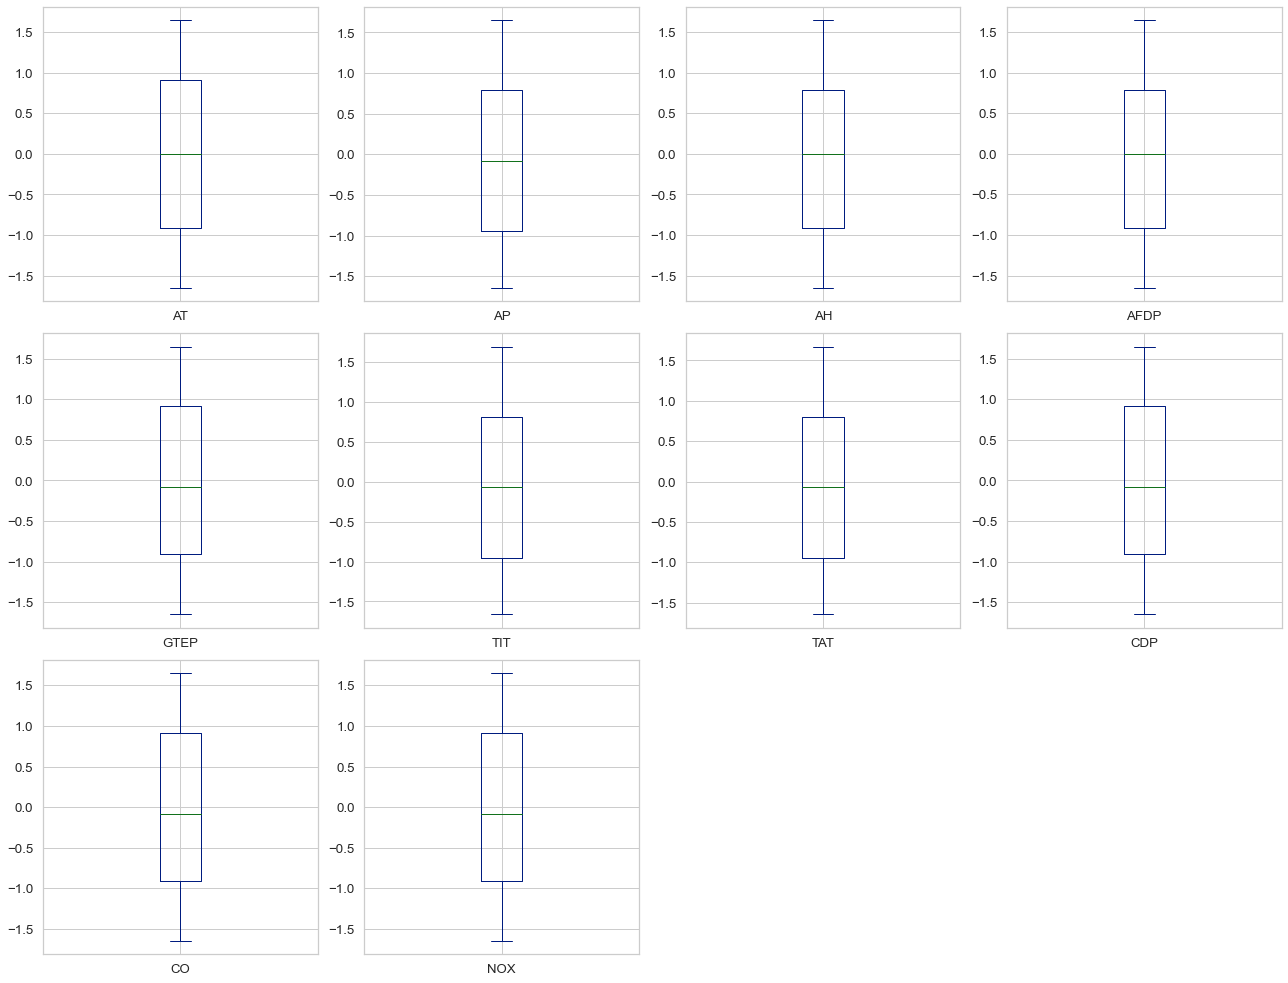

In [19]:
# Cast to Dataframe
scaled = pd.DataFrame(X_train, columns=headers)

# Univariate Boxplot
%matplotlib inline
fig = plt.figure(figsize=(18,18))
ax = fig.gca()
scaled.plot(ax = ax, kind='box', subplots=True, layout = (4,4), sharex = False)
plt.title('Predictores', fontsize=16)
plt.grid()
plt.tight_layout();

In [20]:
# Predictors with bias
print(scaled.skew().sort_values())

TIT    -0.03
NOX     0.00
AFDP    0.00
AH      0.00
CO      0.00
AT      0.00
GTEP    0.00
CDP     0.00
AP      0.01
TAT     0.02
dtype: float64


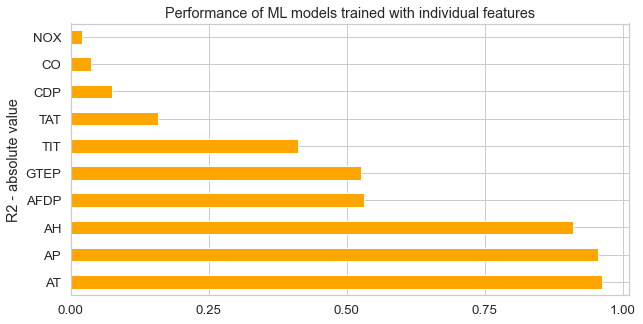

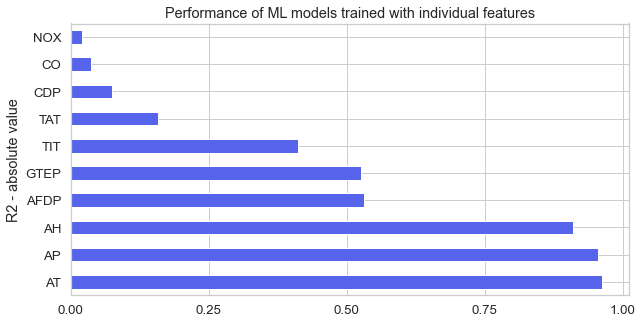

In [21]:
# Future imoprtance
from sklearn.ensemble import RandomForestRegressor
from feature_engine.selection import SelectBySingleFeaturePerformance

rf = RandomForestRegressor(n_estimators=10, max_depth=2, random_state=1, n_jobs=-1)

# set up the selector
sel = SelectBySingleFeaturePerformance(
    variables=None,
    estimator=rf,
    scoring="r2",
    cv=3,
    threshold=0.5)

# Find predictive features
sel.fit(X_train, y_train)

# Plotting with R2
pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.barh(figsize=(10, 5), color='orange')
plt.title('Performance of ML models trained with individual features')
plt.ylabel('R2 - absolute value')
plt.xticks(np.arange(0, 1.01, 0.25))
plt.yticks(range(X.shape[1]), labels=X.columns)
plt.grid(True)
plt.show();

# Same plot but taking the absolute value of the R2
np.abs(pd.Series(sel.feature_performance_)).sort_values(ascending=False).plot.barh(figsize=(10, 5), color='#5564eb')
plt.title('Performance of ML models trained with individual features')
plt.ylabel('R2 - absolute value')
plt.xticks(np.arange(0, 1.01, 0.25))
plt.yticks(range(X.shape[1]), labels=X.columns)
plt.grid(True)
plt.show();

In [22]:
# The features that will be removed
print('Features to drop', len(sel.features_to_drop_))

Features to drop 5


In [23]:
# Features a dropear
best_features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP']
drop = [c for c in scaled.columns if c not in best_features]
print(drop)

['TIT', 'TAT', 'CDP', 'CO', 'NOX']


In [24]:
# Casting to Dataframe
X_train = pd.DataFrame(X_train, columns=headers)
X_test = pd.DataFrame(X_test, columns=headers)
X_val = pd.DataFrame(X_val, columns=headers)

# Droping
X_train.drop(drop, axis=1, inplace=True)
X_test.drop(drop, axis=1, inplace=True)
X_val.drop(drop, axis=1, inplace=True)

# Casting to Numpy Array
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
X_val = np.asarray(X_val)

In [25]:
# Exportar
# np.save('X_train.npy', X_train)
# np.save('y_train.npy', y_train)
# np.save('X_val.npy', X_val)
# np.save('y_val.npy', y_val)

In [26]:
# Spot-Check Algorithms
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Models
models = list()
models.append(('RFR', RandomForestRegressor()))
models.append(('HGBR', HistGradientBoostingRegressor()))
models.append(('BR', BaggingRegressor()))
models.append(('XGBR', XGBRegressor()))
models.append(('LGBR', LGBMRegressor()))

# Evaluate each model in turn
results = list()
names = list()
scoring = 'neg_mean_squared_error'

for name, model in models:
    rkfold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=seed)
    # Cross Validation
    cv_results = cross_val_score(model, X_train, y_train, cv=rkfold, scoring=scoring, n_jobs=-1)
    cv_results = abs(cv_results)
    results.append(cv_results)
    names.append(name)
    print(f'{name} | RMSE: {round(np.sqrt(cv_results.mean()*100), 2)} | RMSE Variance: {round(np.sqrt(cv_results.std()*100), 2)}')

RFR | RMSE: 14.85 | RMSE Variance: 4.99
HGBR | RMSE: 15.04 | RMSE Variance: 4.59
BR | RMSE: 15.43 | RMSE Variance: 5.18
XGBR | RMSE: 14.8 | RMSE Variance: 4.64
LGBR | RMSE: 14.98 | RMSE Variance: 4.77


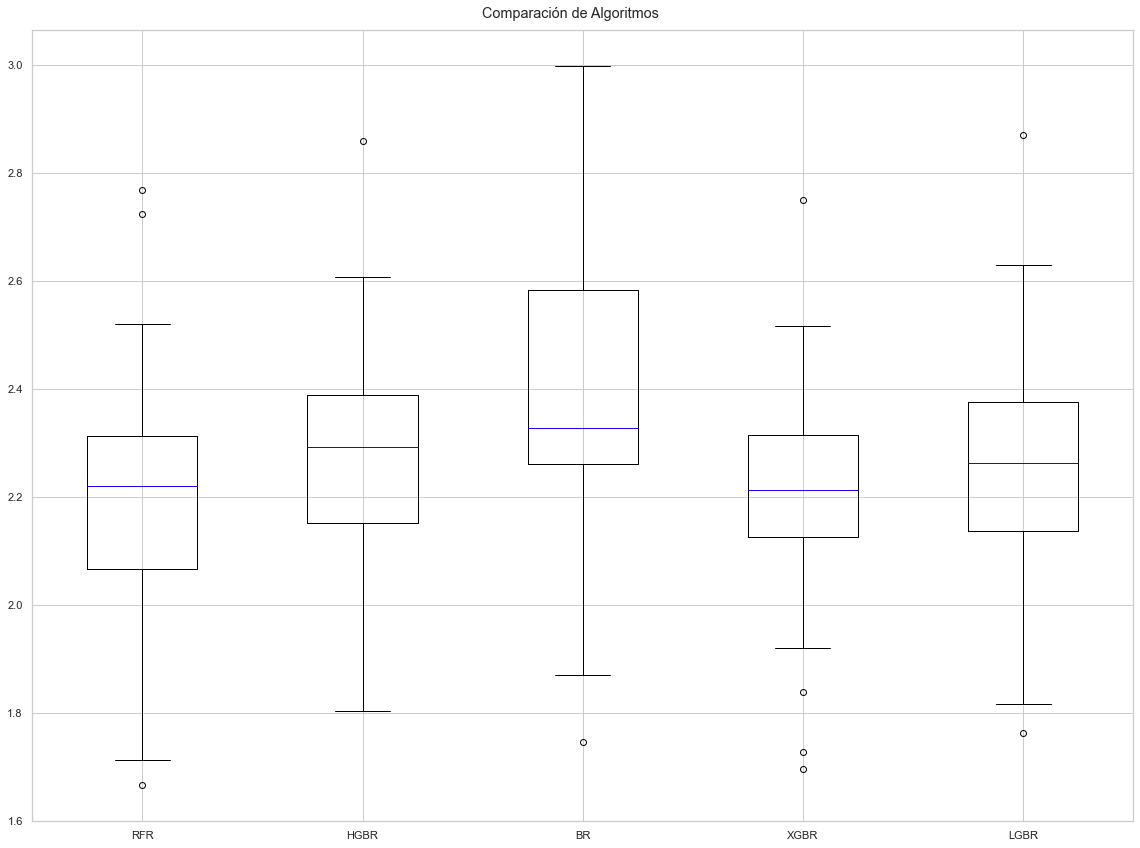

In [27]:
# Boxplot Algorithm comparison
fig = plt.figure(figsize=(16,12))
sns.set_theme(style='whitegrid', palette='gnuplot2', color_codes=True)
fig.suptitle('Comparación de Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.tight_layout();

In [28]:
from sklearn.ensemble import VotingRegressor

estimators = list()
estimators.append(('RFR', RandomForestRegressor()))
estimators.append(('HGBR', HistGradientBoostingRegressor()))
estimators.append(('BR', BaggingRegressor()))
estimators.append(('XGBR', XGBRegressor()))
estimators.append(('LGBR', LGBMRegressor()))

# Ensemble model
ensemble = VotingRegressor(estimators, n_jobs=-1)

# Results
results = cross_val_score(ensemble, X_train, y_train, cv=rkfold, scoring=scoring, n_jobs=-1)
print(f'RMSE: {np.abs(round(results.mean(), 2))}')
print(f'RMSE Std: {np.abs(round(results.std(), 2))}')

RMSE: 2.06
RMSE Std: 0.23


In [29]:
# Fit
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('RFR', RandomForestRegressor()),
                            ('HGBR', HistGradientBoostingRegressor()),
                            ('BR', BaggingRegressor()),
                            ('XGBR',
                             XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning...e=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constra

In [30]:
# Prediction
y_pred = ensemble.predict(X_val)
print(y_pred[:20])

[160.65772461 145.92174744 126.81184289 134.71489225 148.93275516
 117.64874817 134.51531043 133.9186671  111.91342957 109.24751987
 167.90012746 133.4849185  153.23627934 118.64131561 133.94863686
 132.71177443 133.48523404 153.42215389 160.25051424 133.07809943]


In [31]:
# Metrics
print(f'RMSE con los datos de validación: %0.2f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print(f'R2 con los datos de validación: %0.2f' % r2_score(y_val, y_pred))
print('• '*20)
print(f'RMSE con los datos de test: %0.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print(f'R2 con los datos de test: %0.2f' % r2_score(y_test, y_pred))

RMSE con los datos de validación: 1.52
R2 con los datos de validación: 0.99
• • • • • • • • • • • • • • • • • • • • 
RMSE con los datos de test: 22.38
R2 con los datos de test: -0.97


In [34]:
# import joblib

# final_model = 'modelo_final.pkl'
# joblib.dump(ensemble, final_model)

['modelo_final.pkl']